# Cell motility study

In [1]:
from pathlib import Path

from physicool import optimization as opt
from physicool.processing import get_cell_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating the initial cell positions .csv file

In [16]:
# Creates an array with the cell coordinates and saves it to a csv file.
# Cells will be placed in a line (y=-450), in the same z-plane (z=0).
cell_definition = 0
z_plane = 0
y_coordinate = -450
x_min = -450
x_max = 450
x_spacing = 50

coords = np.asarray([[x, y_coordinate, z_plane, cell_definition] 
                     for x in np.arange(x_min, x_max+1, x_spacing)])
                     
np.savetxt("config/cells.csv", coords, delimiter=",")

## Setting up the environment

In [2]:
def prepare_environment() -> None:
    """Cleans the output and tmp files if they exist."""
    opt.clean_outputs()
    opt.clean_tmp_files()

# Compiles the project and creates a black box object for it
#opt.compile_project()    
black_box = opt.PhysiCellBlackBox()

## Running the model

In [3]:
prepare_environment()
black_box.run()

Using config file ./config/PhysiCell_settings.xml ... 
1
dc? 1
User parameters in XML config file: 
Bool parameters:: 

Int parameters:: 
random_seed: 1 [dimensionless]
number_of_cells: 5 [none]

Double parameters:: 
div_initialization: 0 [dimensionless]

String parameters:: 


which boundaries?
1 1 1 1 1 1

Microenvironment summary: microenvironment: 

Mesh information: 
type: uniform Cartesian
Domain: [-500,500] micron x [-500,500] micron x [-10,10] micron
   resolution: dx = 20 micron
   voxels: 2500
   voxel faces: 0
   volume: 2e+07 cubic micron
Densities: (1 total)
   substrate:
     units: dimensionless
     diffusion coefficient: 100000 micron^2 / min
     decay rate: 10 min^-1
     diffusion length scale: 100 micron
     initial condition: 0 dimensionless
     boundary condition: 0 dimensionless (enabled: true)

virtual_wall_at_domain_edge: enabled
Processing default ... 
Note: setting cell definition to 2D based on microenvironment domain settings ... 
Note: Overriding to set

## Plotting the results

<IPython.core.display.Javascript object>


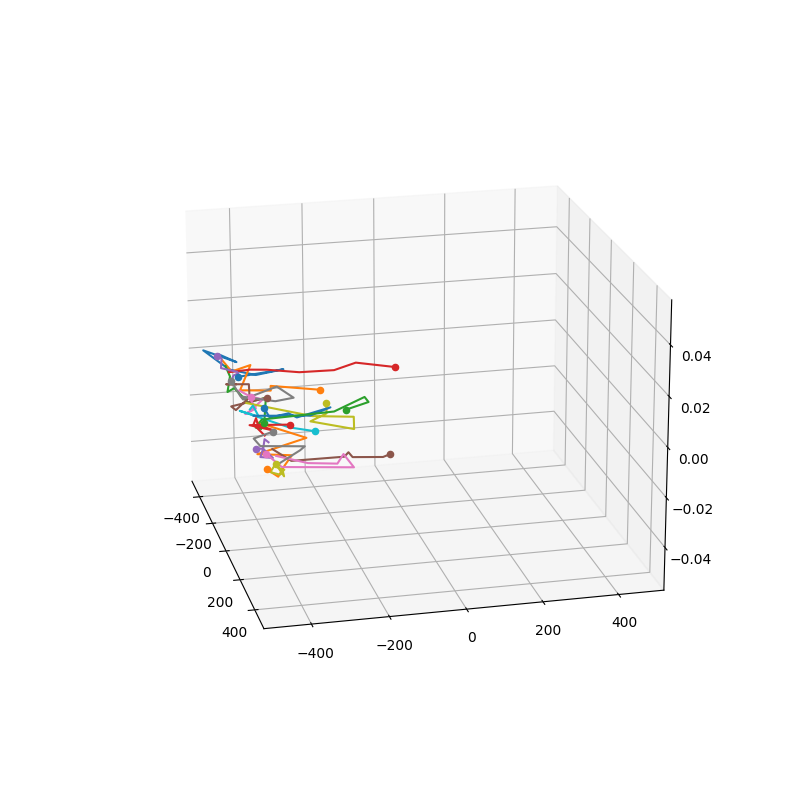

In [4]:
%matplotlib notebook

# Extracts the coordinates and cell IDs for all the timesteps
number_of_timepoints = 7
variables = ["ID", "position_x", "position_y", "position_z"]

values = []
for time in range(number_of_timepoints):
    data = get_cell_data(timestep=time, 
                         variables=variables, 
                         output_path="temp")
    
    values.append(data)

# Creates a new DataFrame with all the time points
new_data = pd.concat(values)

# Restructure the data to get the trajectories for every cell 
trajectories = [new_data[new_data["ID"] == cell_id][["position_x", "position_y", "position_z"]]
                for cell_id in new_data["ID"].unique()]

# Plot the cell trajectories as lines and final positions as scatter points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for cell in trajectories:
    ax.plot(cell["position_x"].values,
            cell["position_y"].values,
            cell["position_z"].values)

    ax.scatter(cell["position_x"].values[-1],
               cell["position_y"].values[-1],
               cell["position_z"].values[-1], marker="o")

ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
plt.show()

## Adding a params updater to the black box

In [9]:
from physicool.updaters import CellUpdater, update_motility_values

# Define the updater we want to use (change motility data)
new_values = {"speed": 20.0, "migration_bias": 0.0}
updater = CellUpdater(updater_function=update_motility_values,
                     config_path="config/PhysiCell_settings.xml", cell_definition_name="default")

# Assign the updater to the black box
black_box.updater = updater

# Run the model with the new values
opt.clean_tmp_files()
black_box.run(params=new_values)

Using config file ./config/PhysiCell_settings.xml ... 
1
dc? 1
User parameters in XML config file: 
Bool parameters:: 

Int parameters:: 
random_seed: 1 [dimensionless]
number_of_cells: 5 [none]

Double parameters:: 
div_initialization: 0 [dimensionless]

String parameters:: 


which boundaries?
1 1 1 1 1 1

Microenvironment summary: microenvironment: 

Mesh information: 
type: uniform Cartesian
Domain: [-500,500] micron x [-500,500] micron x [-10,10] micron
   resolution: dx = 20 micron
   voxels: 2500
   voxel faces: 0
   volume: 2e+07 cubic micron
Densities: (1 total)
   substrate:
     units: dimensionless
     diffusion coefficient: 100000 micron^2 / min
     decay rate: 10 min^-1
     diffusion length scale: 100 micron
     initial condition: 0 dimensionless
     boundary condition: 0 dimensionless (enabled: true)

virtual_wall_at_domain_edge: enabled
Processing default ... 
Note: setting cell definition to 2D based on microenvironment domain settings ... 
Note: Overriding to set

<IPython.core.display.Javascript object>


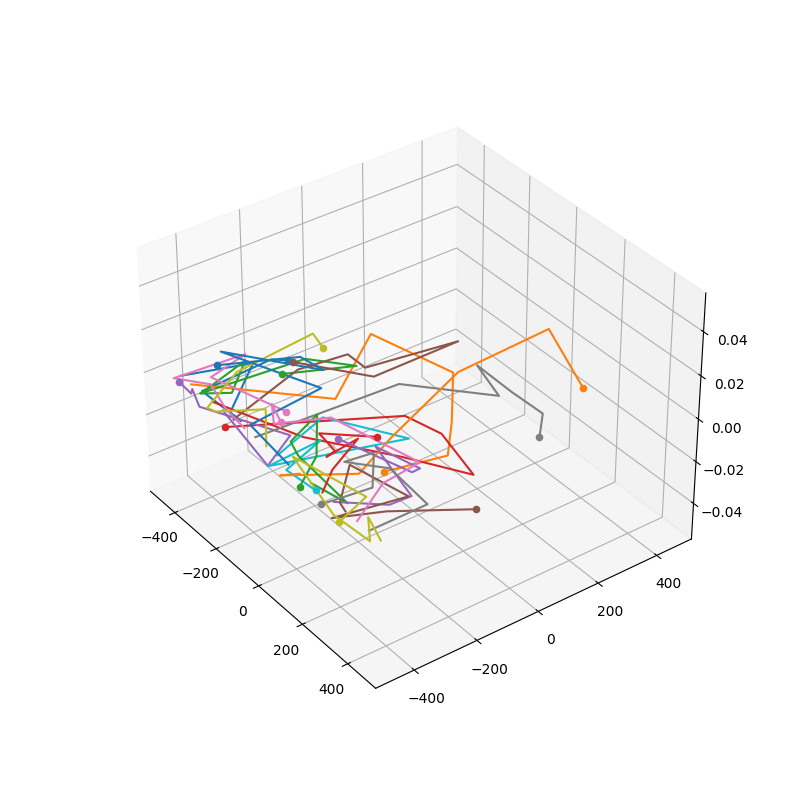

In [10]:
# Extracts the coordinates and cell IDs for all the timesteps
number_of_timepoints = 7
variables = ["ID", "position_x", "position_y", "position_z"]

values = []
for time in range(number_of_timepoints):
    data = get_cell_data(timestep=time, 
                         variables=variables, 
                         output_path="temp")
    
    values.append(data)

# Creates a new DataFrame with all the time points
new_data = pd.concat(values)

# Restructure the data to get the trajectories for every cell 
trajectories = [new_data[new_data["ID"] == cell_id][["position_x", "position_y", "position_z"]]
                for cell_id in new_data["ID"].unique()]

# Plot the cell trajectories as lines and final positions as scatter points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for cell in trajectories:
    ax.plot(cell["position_x"].values,
            cell["position_y"].values,
            cell["position_z"].values)

    ax.scatter(cell["position_x"].values[-1],
               cell["position_y"].values[-1],
               cell["position_z"].values[-1], marker="o")

ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
plt.show()